## ML Modelling Analysis

### Import Libraries

In [45]:
import sys
print(sys.executable)

/opt/homebrew/opt/python@3.11/bin/python3.11


In [ ]:
# Import necessary libraries
import math
import joblib
import shap
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from scipy.stats import f_oneway
from sklearn.impute import SimpleImputer

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# Set the style for our visualizations
plt.style.use('ggplot')

### Preprocessing Validation

In [29]:
# Load dataset
Diabetes = pd.read_csv('diabetes_data_upload.csv')
print("✔ Raw data loaded successfully.")

# 🛠️ Fix spaces and lowercase
Diabetes.columns = Diabetes.columns.str.strip().str.lower()

# 🛠️ Print columns to debug
print("Loaded columns are:")
for col in Diabetes.columns:
    print(f"'{col}'")

# 🛠️ Smart assert
required_columns = {'age', 'polyuria', 'polydipsia', 'weakness', 'obesity', 'class'}
missing_cols = required_columns - set(Diabetes.columns)
assert not missing_cols, f"Missing columns: {missing_cols}"

print("✔ Preprocessing validation passed. Proceeding to modeling.")


✔ Raw data loaded successfully.
Loaded columns are:
'age'
'gender'
'polyuria'
'polydipsia'
'sudden weight loss'
'weakness'
'polyphagia'
'genital thrush'
'visual blurring'
'itching'
'irritability'
'delayed healing'
'partial paresis'
'muscle stiffness'
'alopecia'
'obesity'
'class'
✔ Preprocessing validation passed. Proceeding to modeling.


In [30]:
# Load preprocessed train/test sets
X_train_scaled, X_test_scaled, y_train, y_test = joblib.load('processed_data.pkl')
print("✔ Preprocessed train/test data loaded successfully.")

✔ Preprocessed train/test data loaded successfully.



### Random Forest Classification

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        46
           1       0.99      0.89      0.94        84

    accuracy                           0.92       130
   macro avg       0.91      0.94      0.92       130
weighted avg       0.93      0.92      0.92       130



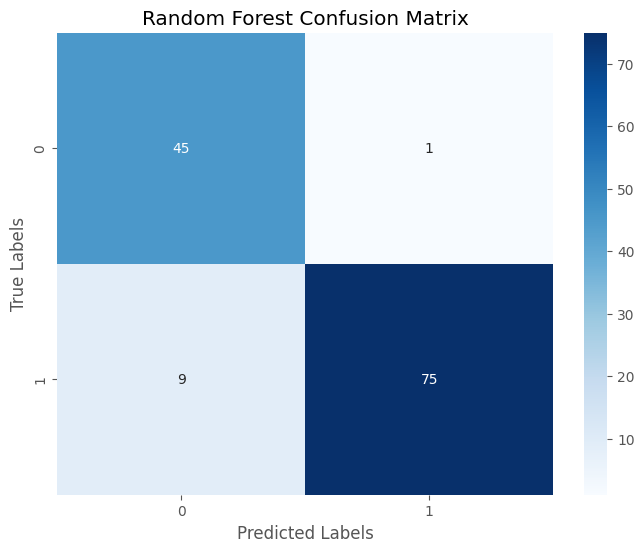

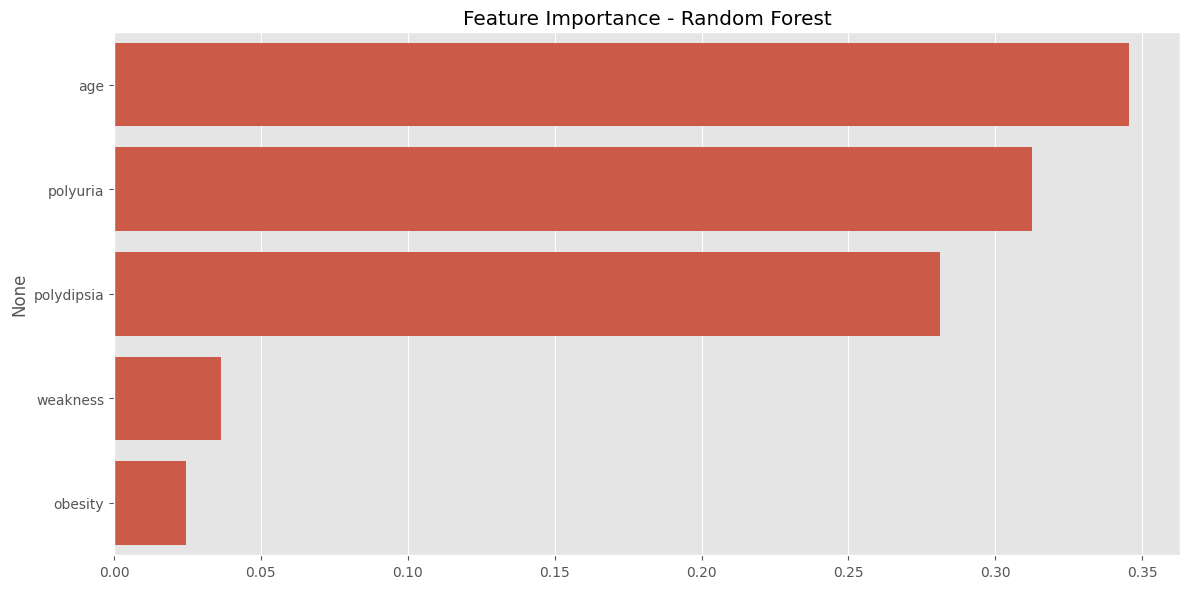

In [33]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

selected_features = ['age', 'polyuria', 'polydipsia', 'weakness', 'obesity']  # make sure this matches your model inputs

# Feature importance
plt.figure(figsize=(12, 6))
importances = pd.Series(rf_model.feature_importances_, index=selected_features)
importances = importances.sort_values(ascending=False)
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


### Support Vector Machine Classification

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        46
           1       0.96      0.86      0.91        84

    accuracy                           0.88       130
   macro avg       0.87      0.90      0.88       130
weighted avg       0.90      0.88      0.89       130



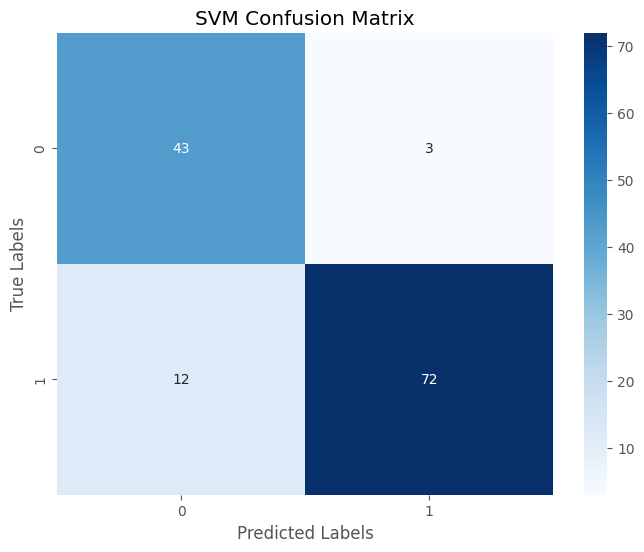

In [34]:
# Train an SVM Classifier
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### K-Nearest Neighbors Classification

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        46
           1       0.96      0.85      0.90        84

    accuracy                           0.88       130
   macro avg       0.86      0.89      0.87       130
weighted avg       0.89      0.88      0.88       130



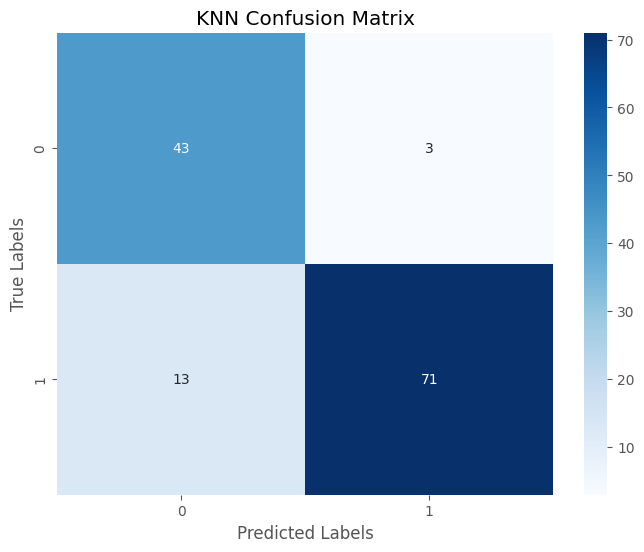

In [35]:
# Train a KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate the model
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Deep Learning Model

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Neural Network Accuracy: 0.8692
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        46
           1       0.92      0.87      0.90        84

    accuracy                           0.87       130
   macro avg       0.85      0.87      0.86       130
weighted avg       0.87      0.87      0.87       130



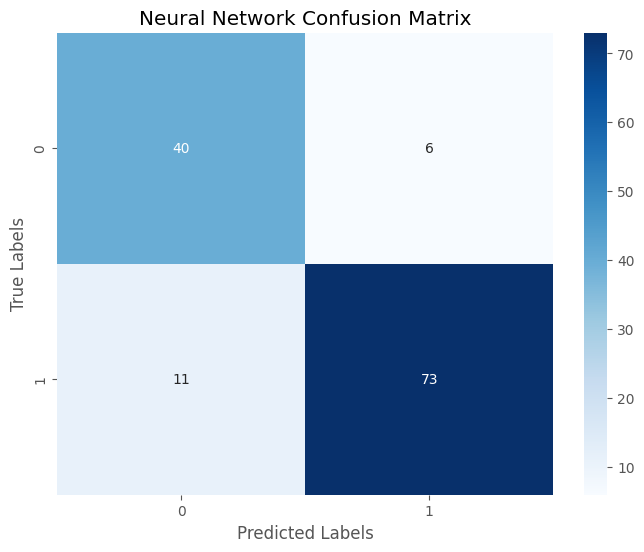

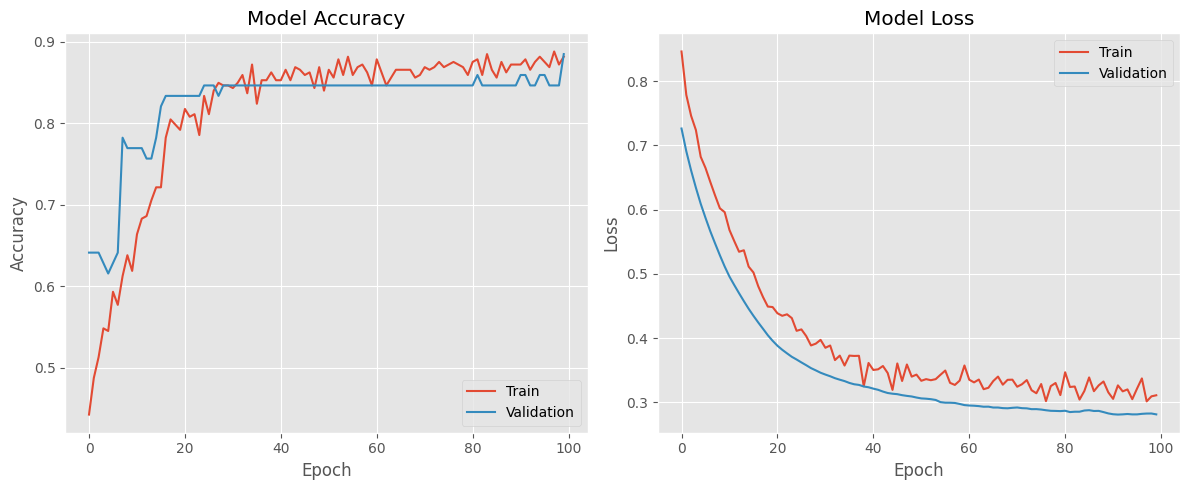

In [36]:
# Building a neural network
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(learning_rate=0.001), 
                  metrics=['accuracy'])
    return model

# Create and train the model
nn_model = create_model(X_train_scaled.shape[1])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
nn_predictions = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

print(f"Neural Network Accuracy: {nn_accuracy:.4f}")
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, nn_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()


### Comparing Model Performance


In [37]:
# Compare model performances
models = {
    'Random Forest': (rf_model, rf_predictions),
    'SVM': (svm_model, svm_predictions),
    'KNN': (knn_model, knn_predictions),
    'Neural Network': (nn_model, nn_predictions)
}

# Create a DataFrame to compare model performance
performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for i, (name, (model, predictions)) in enumerate(models.items()):
    report = classification_report(y_test, predictions, output_dict=True)
    performance_df.loc[i] = [
        name,
        report['accuracy'],
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    ]

print("Model Performance Comparison:")
performance_df

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.923077,0.932524,0.923077,0.924231
1,SVM,0.884615,0.896951,0.884615,0.886491
2,KNN,0.876923,0.891662,0.876923,0.879061
3,Neural Network,0.869231,0.874605,0.869231,0.870595


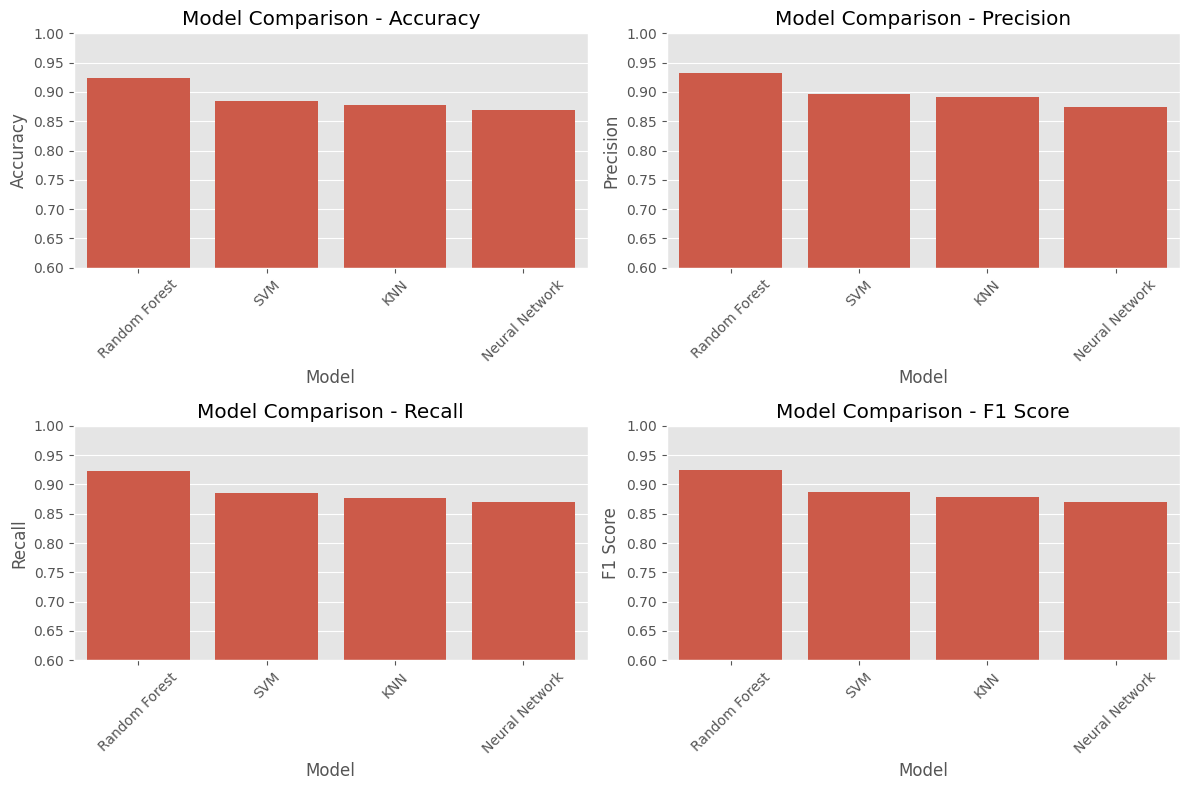

In [38]:
# Visualize model comparison
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Model', y=metric, data=performance_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=45)
    plt.ylim(0.6, 1.0)  # Adjust as needed
plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


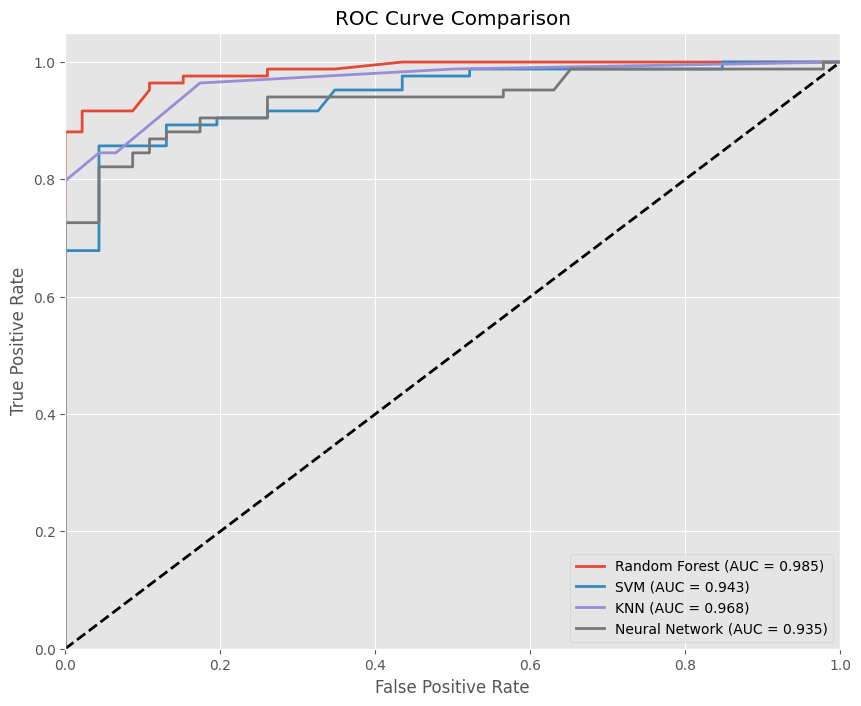

In [39]:
# ROC Curve comparison
plt.figure(figsize=(10, 8))

for name, (model, _) in models.items():
    if name == 'Neural Network':
        y_score = nn_model.predict(X_test_scaled)
    else:
        y_score = model.predict_proba(X_test_scaled)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## ⚙️ Hyperparameter Tuning for SVM

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=42), 
                       param_grid=svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_
print(f"Best SVM Params: {svm_grid.best_params_}")

Best SVM Params: {'C': 10, 'gamma': 'scale'}


## 📉 Confusion Matrix Comparison

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


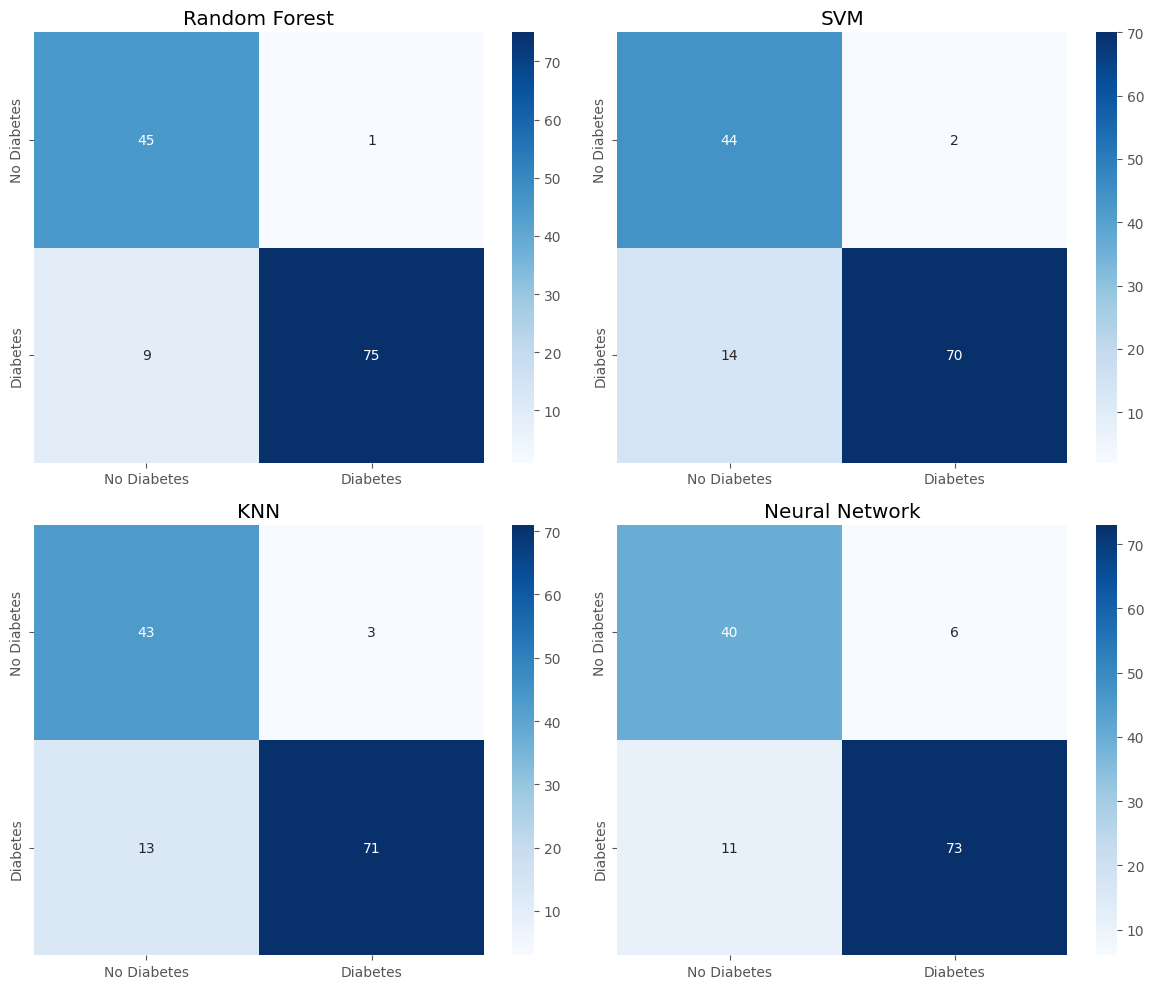

In [41]:

# 📉 Confusion Matrix Comparison (Final 2x2 Version)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
models = {
    'Random Forest': rf_model,
    'SVM': best_svm,
    'KNN': knn_model,
    'Neural Network': nn_model
}
for i, (name, model) in enumerate(models.items()):
    row, col = divmod(i, 2)
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int) if name == 'Neural Network' \
             else model.predict(X_test_scaled)
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, fmt='d', ax=axes[row, col], cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    axes[row, col].set_title(name)
plt.tight_layout()
plt.show()


## 📊 SHAP Analysis for Interpretability

In [10]:
# Load preprocessed train/test data
X_train_scaled, X_test_scaled, y_train, y_test = joblib.load('processed_data.pkl')
print("✔ Preprocessed data loaded successfully!")

✔ Preprocessed data loaded successfully!


In [11]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

print("✔ Random Forest model trained successfully!")

✔ Random Forest model trained successfully!


<Figure size 640x480 with 0 Axes>

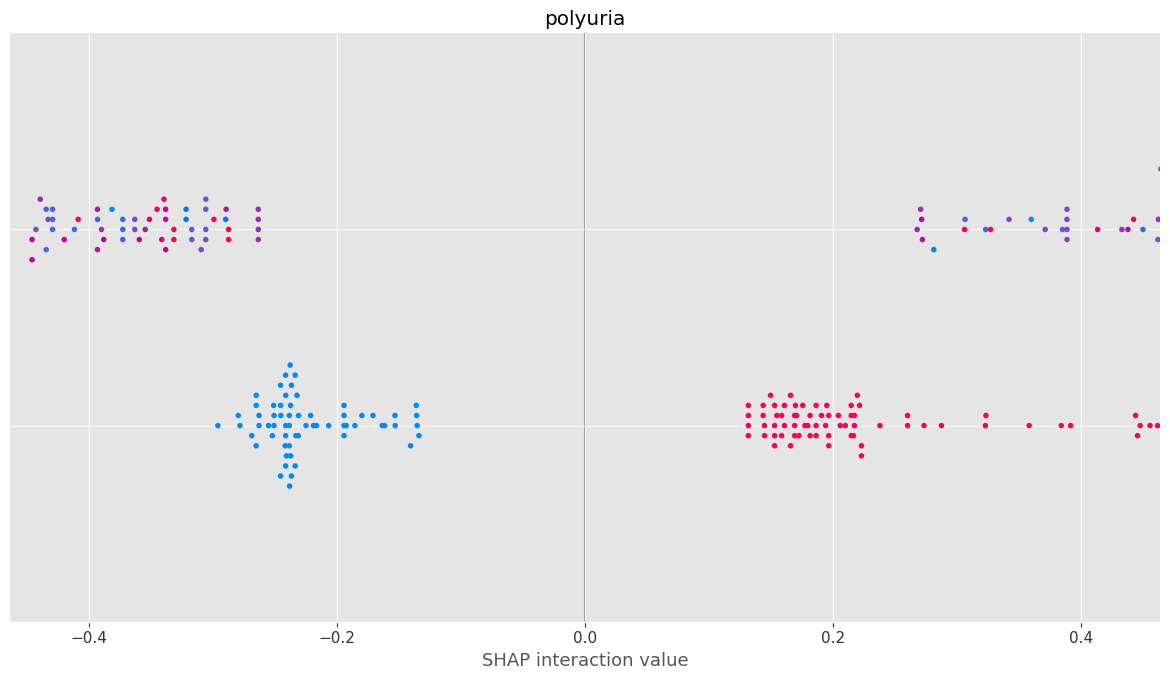

In [18]:

# Create explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate shap values
shap_values = explainer.shap_values(X_test_scaled)

# Wrap scaled test set into DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test_scaled_df, feature_names=selected_features, plot_type='bar')


### PCA Explained Variance Check

In [19]:

# This assumes you have the PCA object from preprocessing
# If not available here, consider moving this to Notebook 1 or importing PCA object
try:
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
    print("Total Explained Variance:", np.sum(pca.explained_variance_ratio_))
except NameError:
    print("PCA object not found in this notebook.")


PCA object not found in this notebook.


### Enhanced Model Evaluation Metrics

In [21]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf_model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[45  1]
 [ 9 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        46
           1       0.99      0.89      0.94        84

    accuracy                           0.92       130
   macro avg       0.91      0.94      0.92       130
weighted avg       0.93      0.92      0.92       130

ROC AUC Score: 0.93555900621118


### Hyperparameter Tuning for Random Forest

In [23]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)
best_rf = grid.best_estimator_


Best Params: {'max_depth': 10, 'n_estimators': 100}


### Model Training Time

In [25]:

import time
start = time.time()
best_rf.fit(X_train_scaled, y_train)
end = time.time()
print(f"Training time: {end - start:.2f} seconds")


Training time: 0.07 seconds


### Save the Trained Model

In [26]:

import joblib
joblib.dump(best_rf, 'best_random_forest_model.pkl')
print("Model saved successfully.")


Model saved successfully.


### Hyperparameter Tuning for KNN

In [27]:

from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5)
knn_grid.fit(X_train_scaled, y_train)
knn_model = knn_grid.best_estimator_
print("Best KNN Params:", knn_grid.best_params_)


Best KNN Params: {'n_neighbors': 5, 'weights': 'distance'}


### Class Imbalance Handling in SVM and Random Forest

In [28]:

from sklearn.svm import SVC

svm_model = SVC(class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

### SHAP for SVM Using KernelExplainer

  0%|          | 0/10 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

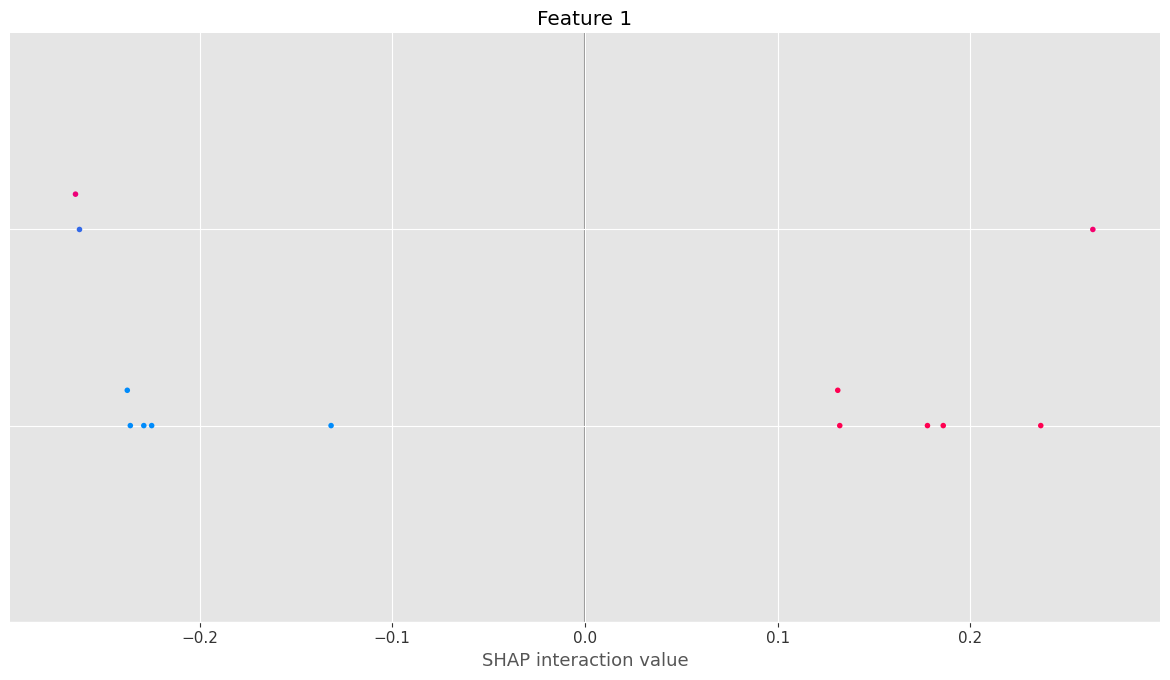

In [29]:
explainer_svm = shap.KernelExplainer(svm_model.predict_proba, X_train_scaled[:100])
shap_values_svm = explainer_svm.shap_values(X_test_scaled[:10])

# Visualize SHAP summary plot (only for binary classification)
shap.summary_plot(shap_values_svm, X_test_scaled[:10])


### Cross-Validation Scores for Model Robustness

In [30]:

from sklearn.model_selection import cross_val_score

print(f"RF CV Accuracy: {cross_val_score(rf_model, X_train_scaled, y_train, cv=5).mean():.3f}")
print(f"SVM CV Accuracy: {cross_val_score(svm_model, X_train_scaled, y_train, cv=5).mean():.3f}")
print(f"KNN CV Accuracy: {cross_val_score(knn_model, X_train_scaled, y_train, cv=5).mean():.3f}")


RF CV Accuracy: 0.918
SVM CV Accuracy: 0.879
KNN CV Accuracy: 0.923
